In [8]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 8.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 10.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)

ModuleNotFoundError: No module named 'pandas'

In [69]:
data = pd.read_csv('../data/waltzdb_export.csv')

In [70]:
data

,Sequence,Classification,TEM Staining,Th-T Binding,FTIR peaks,Proteostat binding,WALTZ,TANGO,PASTA parallel,PASTA antiparallel,FTIR Image,TEM image,THT image,Reference,CF Helix,CF Strand,Hydrophobicity,Structures,UniProt AC,UniProt ID,Position,Mutant,Class,Model,Stability,Backbone Hbond,Electrostatic kon,Electrostatics,Entropy Mainchain,Entropy Sidechain,Sidechain Hbond,Solvation Hydrophobic,Solvation Polar,VdW,VdW Clashes
0,AAAQAA,non-amyloid,no,NaN,NaN,NaN,0.0,0.0,3.08,2.60,NaN,NaN,NaN,NaN,136.8,87.5,83.3,N.A.,TADBP_HUMAN,Q13148,324.0,NaN,7,AAAQAA.pdb,18.10,-42.0,-1.8,-4.0,75.5,8.4,-3.0,-38.8,53.3,-31.9,2.2
1,AAELRN,non-amyloid,N.A.,NaN,NaN,NaN,0.0,0.0,2.36,2.29,NaN,NaN,NaN,20154676.0,120.2,85.8,50.0,N.A.,N.A.,N.A.,0.0,NaN,1,AAELRN.pdb,-0.40,-51.0,1.9,1.1,81.0,23.2,-8.8,-75.8,83.0,-56.0,0.0
2,AAIDWF,non-amyloid,no,NaN,NaN,NaN,0.0,0.0,-2.09,-1.02,NaN,NaN,NaN,NaN,119.0,109.2,83.3,N.A.,FUS_HUMAN,P35637,349.0,NaN,1,AAIDWF.pdb,-2.50,-51.4,6.0,8.4,81.7,27.0,0.0,-103.9,95.3,-73.7,0.7
3,AAIGWG,non-amyloid,no,NaN,NaN,NaN,0.0,0.0,0.66,0.48,NaN,NaN,NaN,NaN,102.3,102.2,66.7,N.A.,TADBP_HUMAN,Q13148,381.0,NaN,5,AAIGWG.pdb,0.90,-36.4,-1.1,-1.5,71.3,15.9,0.0,-58.3,46.8,-40.0,2.4
4,AAIIGQ,amyloid,N.A.,NaN,NaN,NaN,0.0,0.0,-2.94,-0.50,NaN,NaN,NaN,27245712.0,111.3,111.8,66.7,N.A.,CSGB_ECOLI,P0ABK7,46.0,NaN,1,AAIIGQ.pdb,-4.50,-52.6,2.4,4.8,83.9,30.9,-13.8,-81.6,79.1,-58.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,YVSGFH,non-amyloid,N.A.,NaN,NaN,NaN,0.0,0.0,-3.32,-4.01,NaN,NaN,NaN,16537487.0,87.0,115.3,50.0,N.A.,B2MG_HUMAN,P61769,46.0,NaN,1,YVSGFH.pdb,12.40,-49.1,2.0,9.4,74.5,25.3,-3.9,-72.3,80.9,-56.8,0.2
1412,YYNYNN,non-amyloid,no,NaN,NaN,NaN,0.0,0.0,-2.19,-0.21,NaN,NaN,NaN,NaN,68.0,118.0,50.0,N.A.,NGR1_YEAST,P32831,509.0,NaN,1,YYNYNN.pdb,-2.10,-52.5,3.5,10.2,76.4,42.9,-35.9,-91.3,107.6,-77.2,9.4
1413,YYQNYQ,amyloid,N.A.,NaN,NaN,NaN,483.6,0.0,0.37,-1.63,NaN,NaN,NaN,20154676.0,82.7,125.0,50.0,N.A.,ERF3_YEAST,P05453,45.0,NaN,1,YYQNYQ.pdb,-3.70,-50.8,3.5,9.6,74.8,54.1,-39.4,-92.8,103.7,-77.1,9.1
1414,YYQNYQ,non-amyloid,no,NaN,NaN,NaN,483.6,0.0,0.37,-1.63,NaN,NaN,NaN,NaN,82.7,125.0,50.0,N.A.,ERF3_YEAST,P05453,45.0,NaN,class7,YYQNYQ.pdb,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
AMYLOID='amyloid'

In [18]:
data.Classification == AMYLOID

0       False
1       False
2       False
3       False
4        True
        ...  
1411    False
1412    False
1413     True
1414    False
1415    False
Name: Classification, Length: 1416, dtype: bool

In [63]:
def treat_data(data):
    data = data.copy()
    data.Classification = data.Classification == AMYLOID
    retain = ['Classification', 'Backbone Hbond', 'Electrostatic kon',
              'Hydrophobicity', 'Solvation Hydrophobic', 'Solvation Polar', 
              'Entropy Mainchain', 'Entropy Sidechain', 'Stability']
    data = data[retain]
    return data

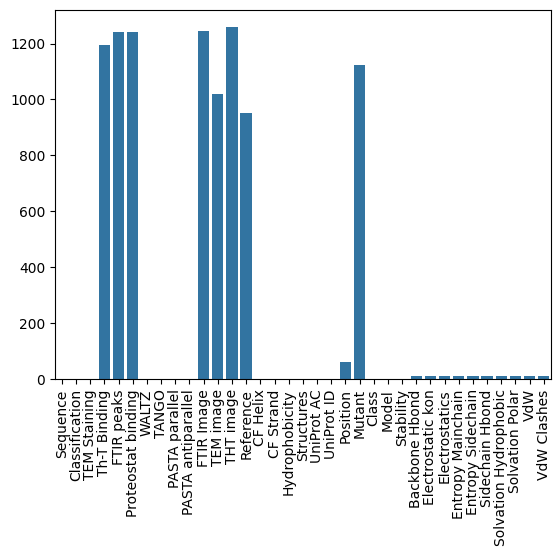

In [79]:
ax = sns.barplot(pd.isna(data).sum())

ax.tick_params(axis='x', rotation=90)

In [55]:
treat_data(data)

,Classification,Backbone Hbond,Electrostatic kon,Hydrophobicity,Solvation Hydrophobic,Solvation Polar,Entropy Mainchain,Entropy Sidechain
0,False,-42.0,-1.8,83.3,-38.8,53.3,75.5,8.4
1,False,-51.0,1.9,50.0,-75.8,83.0,81.0,23.2
2,False,-51.4,6.0,83.3,-103.9,95.3,81.7,27.0
3,False,-36.4,-1.1,66.7,-58.3,46.8,71.3,15.9
4,True,-52.6,2.4,66.7,-81.6,79.1,83.9,30.9
...,...,...,...,...,...,...,...,...
1411,False,-49.1,2.0,50.0,-72.3,80.9,74.5,25.3
1412,False,-52.5,3.5,50.0,-91.3,107.6,76.4,42.9
1413,True,-50.8,3.5,50.0,-92.8,103.7,74.8,54.1
1414,False,NaN,NaN,50.0,NaN,NaN,NaN,NaN


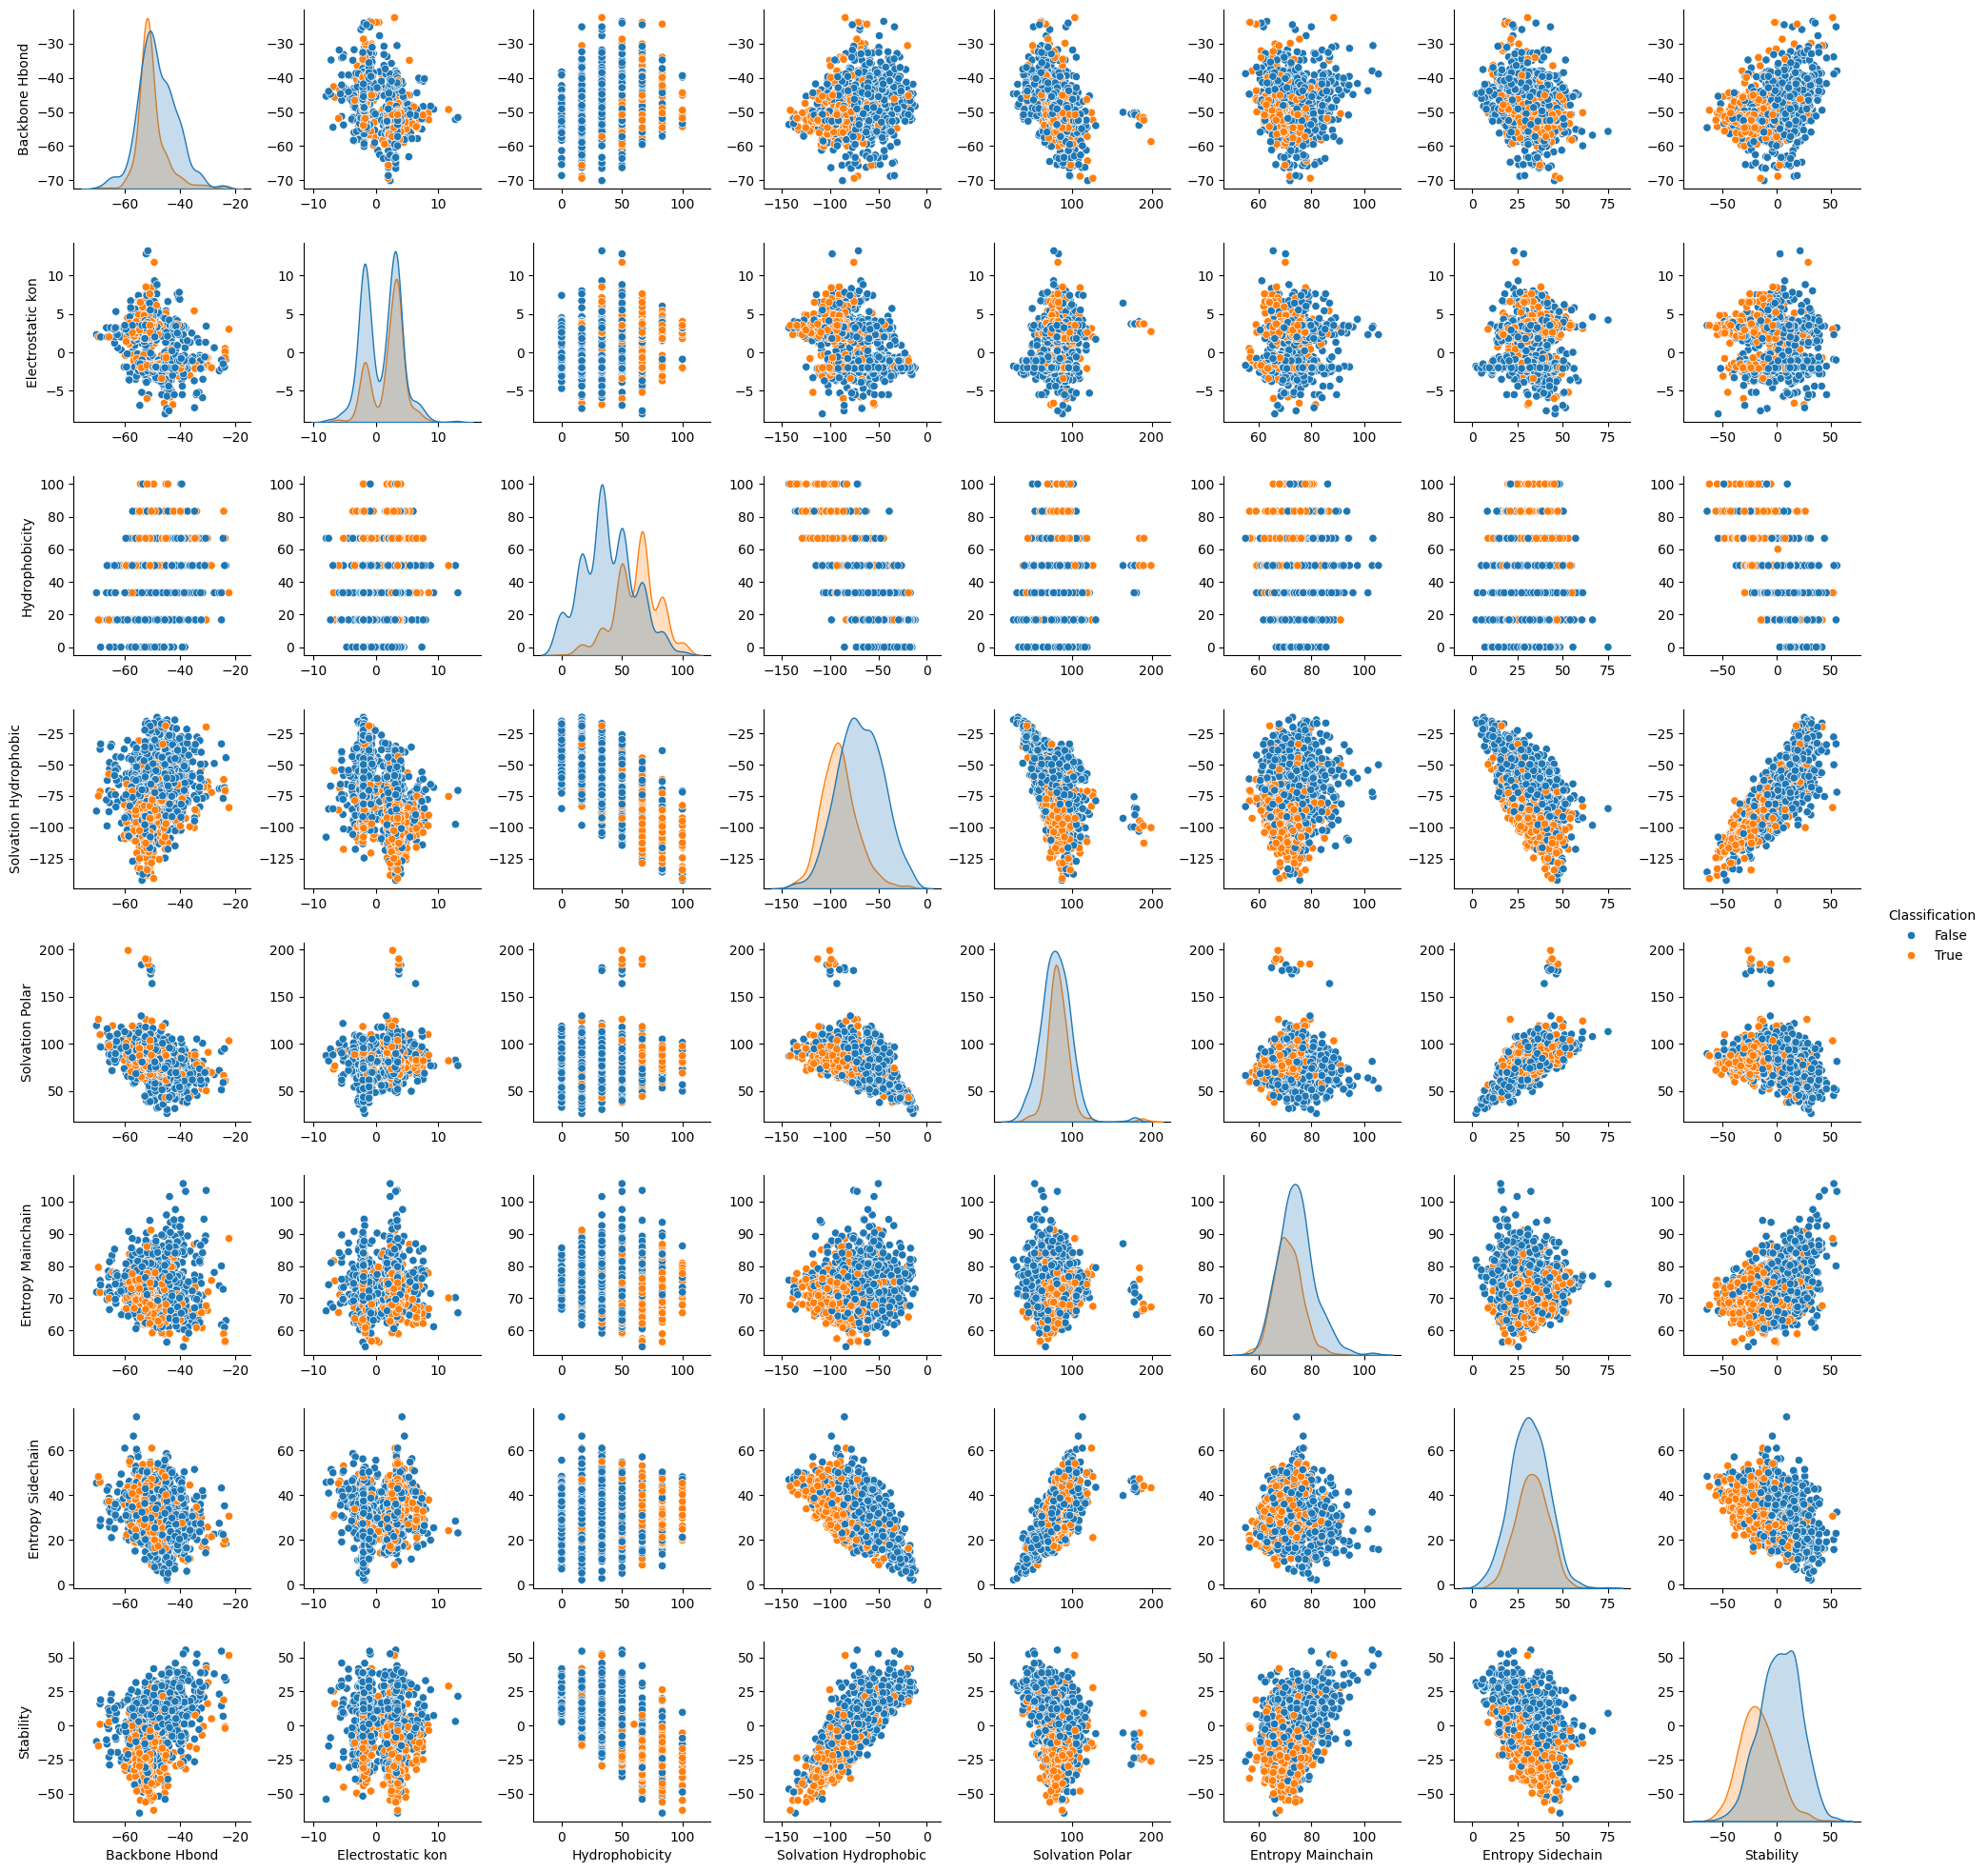

In [64]:
tdata = treat_data(data)
pp = sns.pairplot(tdata, hue='Classification')

for ax in pp.axes.flat:
    ax.tick_params(axis='both', labelleft=True, labelbottom=True)
    
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()